# Exploration of room simulation methods

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
%matplotlib notebook

## Create 2D room

<IPython.core.display.Javascript object>


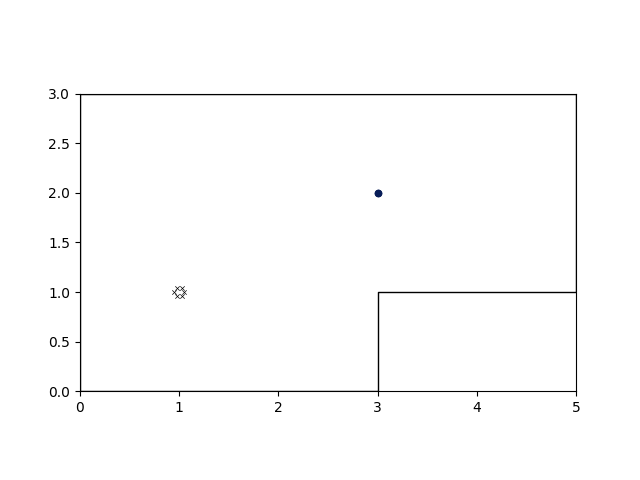

In [20]:
corners = np.array([[0,0], [0,3], [5,3], [5,1], [3,1], [3,0]]).T

fs, audio = wavfile.read("../sounds/CantinaBand3.wav")

room = pra.Room.from_corners(corners, fs=fs)
room.add_source([3., 2.], signal=audio)

# add circular array
R = pra.circular_2D_array(center=[1, 1], M=6, phi0=0, radius=0.05)
room.add_microphone_array(R)

fig, ax = room.plot()
ax.set_xlim([0, 5])
ax.set_ylim([0, 3])

plt.show()

### Simulate the room created above

In [12]:
room.simulate()

data = room.mic_array.signals.T
cols = [f'mic_{i}' for i in range(1, 7)]
df = pd.DataFrame(data=data, columns=cols, dtype=np.int16)

df.to_csv(f'../training_data/simulation2D.csv')

## Create 3D room

<IPython.core.display.Javascript object>


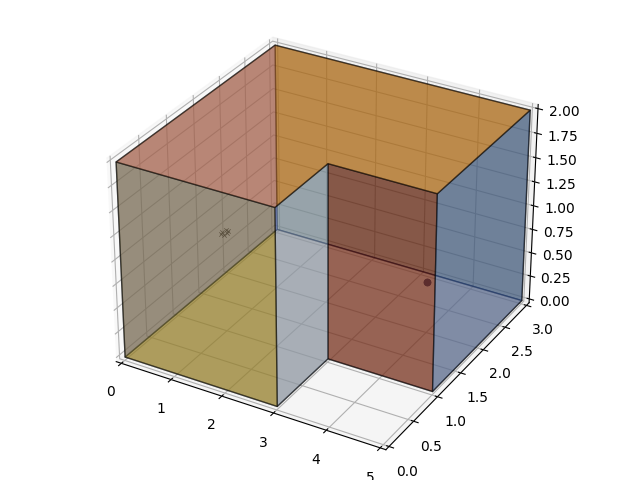

In [42]:
room = pra.Room.from_corners(corners)
room.extrude(2.)
room.add_source([4., 2., 0.5], signal=audio, delay=0.5)
R = pra.circular_2D_array(center=[1, 1], M=6, phi0=0, radius=0.05)

# Add the array after extending it to 3D
room.add_microphone_array(np.vstack((R, [1] * 6)))

fig, ax = room.plot()
ax.set_xlim([0, 5])
ax.set_ylim([0, 3])
ax.set_zlim([0, 2]);

### Simulate the 3D room

In [44]:
room.simulate()

data = room.mic_array.signals.T
cols = [f'mic_{i}' for i in range(1, 7)]
df = pd.DataFrame(data=data, columns=cols, dtype=np.int16)

df.to_csv(f'../training_data/simulation3D.csv')

df.iloc[4500:4520]

,mic_1,mic_2,mic_3,mic_4,mic_5,mic_6
4500,-1,-1,-1,-1,-1,-2
4501,0,-1,-1,-1,-2,-2
4502,0,0,0,0,-1,0
4503,0,0,1,-1,0,0
4504,2,1,0,0,0,0
4505,2,2,2,0,0,2
4506,1,1,2,1,3,1
4507,3,3,1,2,1,3
4508,2,1,3,2,3,2
4509,1,2,1,3,3,2
